# MACSS 30100 Problem Set #6
## Author:Ling Dai

In [8]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_graphviz
import graphviz

# Problem 1

In [9]:
#import data
biden = pd.read_csv('https://raw.githubusercontent.com/UC-MACSS/persp-model_W18/master/ProblemSets/PS6/biden.csv', sep = ",")
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


## 1 (a)

In [10]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values

In [11]:
#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    random_state=0)

In [12]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
biden_tree1 = DecisionTreeRegressor(min_samples_leaf = 10, random_state=0)
biden_tree1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

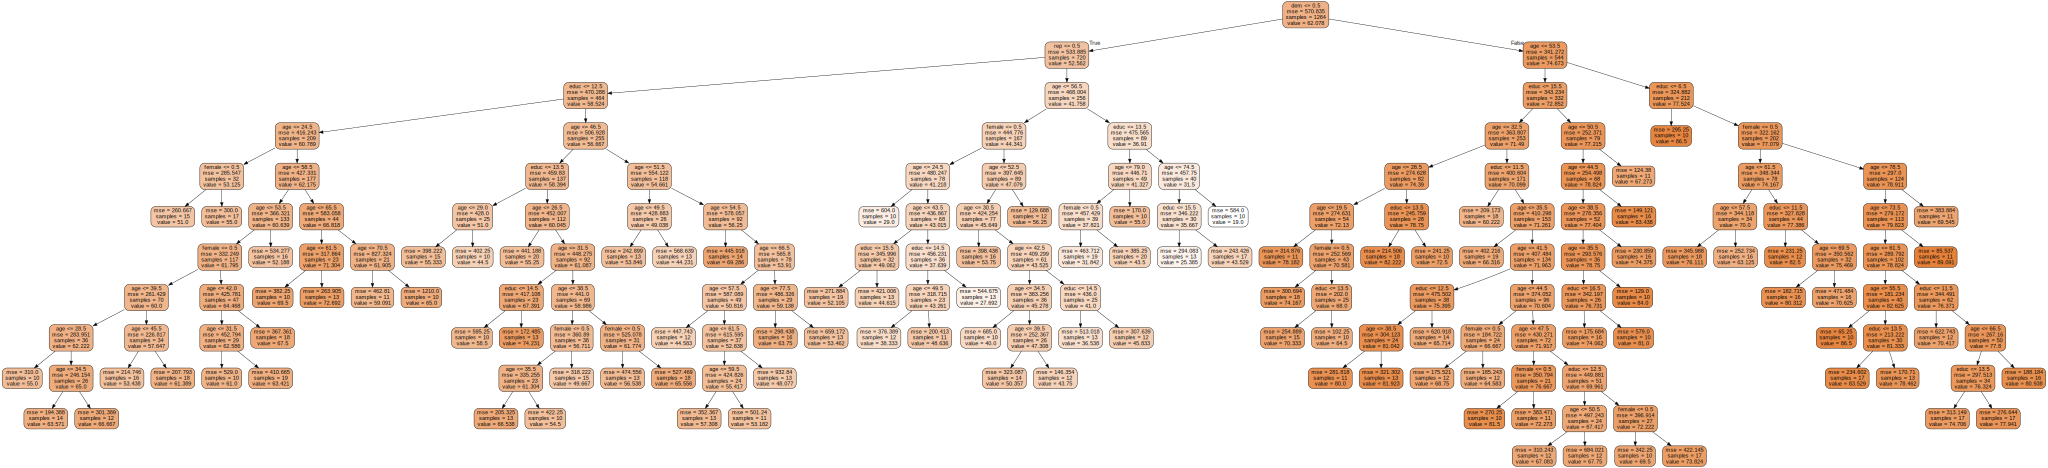

In [13]:
#Plot decision tree
biden_tree_viz1 = export_graphviz(biden_tree1,
                                  out_file=None,
                                  feature_names=['female', 'age', 'educ', 'dem', 'rep'],
                                  rounded=True,
                                  filled=True)

graph = graphviz.Source(biden_tree_viz1)
graph.render('biden_tree_viz1')
graph

In [14]:
#Report test MSE
y_pred = biden_tree1.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('Test MSE =', MSE)

Test MSE = 394.1722278972896


When not controlled, the decision tree regressor produced a complex tree model with many levels, making interpretation very difficult. However, we can try to interpret the model at the highest two levels. First, we can observe that at the highest level, all respondents are first classified into two branches based on whether they are Democrats. The left branch (non-Democrats) shared a much lower mean value of 'biden' as compared to the right branch (Democrats), which means that Democrats tend to have a much 'warmer' feeling towards Biden on average. For those that are not Democrats, the next classifying criterion is whether the respondents are Republicans. According to the model, respondents who are Republicans tend to have a much cooler feeling toward Biden on average as compared to those who are neither Democrats nor Republicans. For a Democrat respondent, however, the second classifying criterion would be whether he/she is more than 53 years old. As the tree model suggests, those who are 54 years old or above tend to have a warmer feeling towards Biden.

## 1 (b)

In [15]:
for depth in range(1,16):
    cv_tree = DecisionTreeRegressor(max_depth=depth, min_samples_leaf = 5)
    cv_tree.fit(X_train, y_train)
    y_pred = cv_tree.predict(X_test)
    MSE = mean_squared_error(y_test, y_pred)
    print("max_depth = {}, test MSE = {}".format(depth, MSE))

max_depth = 1, test MSE = 392.05554530828823
max_depth = 2, test MSE = 365.3120967159688
max_depth = 3, test MSE = 370.0512903734935
max_depth = 4, test MSE = 372.8068024440834
max_depth = 5, test MSE = 385.75844605328336
max_depth = 6, test MSE = 395.59669732363994
max_depth = 7, test MSE = 405.6298552283776
max_depth = 8, test MSE = 403.2922514171707
max_depth = 9, test MSE = 418.71450955271234
max_depth = 10, test MSE = 422.764785354949
max_depth = 11, test MSE = 421.8120997826666
max_depth = 12, test MSE = 418.56017118090557
max_depth = 13, test MSE = 420.78650478940904
max_depth = 14, test MSE = 428.1602926251348
max_depth = 15, test MSE = 428.9748800207813


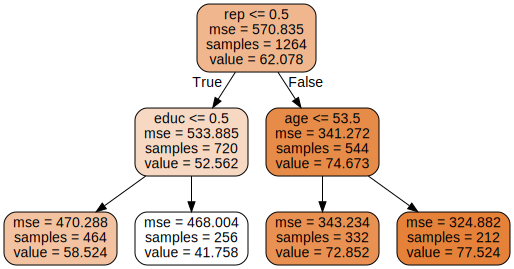

In [16]:
#Plot tree for max_depth = 2

biden_tree2 = DecisionTreeRegressor(max_depth=2, random_state=0)
biden_tree2.fit(X_train, y_train)

biden_tree_viz2 = export_graphviz(biden_tree2,
                                  out_file=None,
                                  feature_names=['female', 'age', 'dem', 'rep', 'educ'],
                                  rounded=True,
                                  filled=True)

graph = graphviz.Source(biden_tree_viz2)
graph.render('biden_tree_viz2')
graph

According to the result of cross validation, setting max_depth = 2 would yield the best prediction accuracy in our case.

The tree model generated above using max_depth = 2 first divide all observations into two groups based on whether they are Republicans. The respondents who are Republicans had an average 'biden' value of 52.562, while the non-Republican respondents had an average 'biden' score of 74.674. This suggests that Republicans tend to have a much colder feeling towards Biden.

At the second level, Republican respondents are futher divided into two groups based on whether they have received at least a year of nformal education, whereas the non-Republican group is further divided based on whether the respondents are 54 years old (or above). The Republicans without formal education tend to share a warmer feeling towards Biden as compared to those with formal education. Moreover, non-Republican respondents who were at least 54 years old reported a warmer feeling towards Biden on average.

## 1(c)

In [17]:
biden_bag1 = BaggingRegressor(DecisionTreeRegressor(), n_estimators = 100,
                              max_samples = 100, random_state = 0)
biden_bag1.fit(X_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=0, verbose=0, warm_start=False)

In [18]:
#Feature importance
importance = np.mean([tree.feature_importances_ for tree in biden_bag1.estimators_], axis=0)
features = ['female', 'age', 'dem', 'rep', 'educ']

for i in range(len(features)):
    print("  {}: {}".format(features[i], importance[i]))

  female: 0.06318337899140888
  age: 0.43095599821037167
  dem: 0.20614678956759877
  rep: 0.18779418929737055
  educ: 0.11191964393324999


In [19]:
y_pred = biden_bag1.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
print('test MSE =', MSE)

test MSE = 376.2218824304277


According to the reported feature importance measures, 'age' is the most important factor in determining the feeling towards Biden, explaining around 43% of the total variance. The next important variables are 'dem' and 'rep', which refer to the political party affiliations of the respondents. The least important feature is 'female', which refers to the gender of a respondent.

## 1(d)

In [20]:
#max_features = 1
biden_forest1 = RandomForestRegressor(n_estimators = 100, max_features = 1, random_state = 0)
biden_forest1.fit(X_train, y_train)
y_pred = biden_forest1.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)

print("Results for m = 1:")

print('\nTest MSE =', MSE)

print('\nFeature Importance:')
importance = biden_forest1.feature_importances_
features = ['female', 'age', 'dem', 'rep', 'educ']
for i in range(len(features)):
    print("  {}: {}".format(features[i], importance[i]))

Results for m = 1:

Test MSE = 473.75320496546647

Feature Importance:
  female: 0.018001455847131167
  age: 0.5257607195386188
  dem: 0.15172357296660327
  rep: 0.17305144964839766
  educ: 0.13146280199924906


In [21]:
#max_features = 2
biden_forest2 = RandomForestRegressor(n_estimators = 100, max_features = 2, random_state = 0)
biden_forest2.fit(X_train, y_train)
y_pred = biden_forest2.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)

print("Results for m = 2:")

print('\nTest MSE =', MSE)

print('\nFeature Importance:')
importance = biden_forest2.feature_importances_
features = ['female', 'age', 'dem', 'rep', 'educ']
for i in range(len(features)):
    print("  {}: {}".format(features[i], importance[i]))

Results for m = 2:

Test MSE = 482.14975924774774

Feature Importance:
  female: 0.02139937149620051
  age: 0.5200145535764963
  dem: 0.15090117750735332
  rep: 0.16894599333144547
  educ: 0.1387389040885044


In [22]:
#max_features = 3
biden_forest3 = RandomForestRegressor(n_estimators = 100, max_features = 3, random_state = 0)
biden_forest3.fit(X_train, y_train)
y_pred = biden_forest3.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)

print("Results for m = 3:")

print('\nTest MSE =', MSE)

print('\nFeature Importance:')
importance = biden_forest3.feature_importances_
features = ['female', 'age', 'dem', 'rep', 'educ']
for i in range(len(features)):
    print("  {}: {}".format(features[i], importance[i]))

Results for m = 3:

Test MSE = 472.83835054159954

Feature Importance:
  female: 0.03296615996429067
  age: 0.4911450336981207
  dem: 0.1659235007473122
  rep: 0.1823853444286286
  educ: 0.12757996116164785


In [23]:
#max_features = 4
biden_forest4 = RandomForestRegressor(n_estimators = 100, max_features = 4, random_state = 0)
biden_forest4.fit(X_train, y_train)
y_pred = biden_forest4.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)

print("Results for m = 4:")

print('\nTest MSE =', MSE)

print('\nFeature Importance:')
importance = biden_forest4.feature_importances_
features = ['female', 'age', 'dem', 'rep', 'educ']
for i in range(len(features)):
    print("  {}: {}".format(features[i], importance[i]))

Results for m = 4:

Test MSE = 467.27794711194457

Feature Importance:
  female: 0.055371478991878026
  age: 0.45285758900342843
  dem: 0.18066850136983356
  rep: 0.2005229620712179
  educ: 0.11057946856364234


According to the results above, when n_estimators is relatively large (so that the results are more stable), the test MSE seemed to decrease as the number of max features increased, despite that m = 1 yielded a slightly better test MSE than m = 2. In this case, the random forest regressor yielded the best prediction when max_features = 4.

As for importance of features, we can see that 'age' was determined to be the most important feature in all 4 cases tested, explaining almost 1/2 of the variation in all random forest models above. The variable 'female' had lowest level of importance in all cases tested.